In [2]:
import os
import math
import cv2 as cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf

#import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import Sequence, to_categorical
#from keras import utils as np_utils

from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau,TensorBoard, Callback
from keras.optimizers import Adam, Optimizer
import keras.backend as K

from sklearn.metrics import cohen_kappa_score, accuracy_score
from sklearn.utils import class_weight

import imgaug as ia
import imgaug.augmenters as iaa



from sklearn.model_selection import KFold, StratifiedKFold

import random

%matplotlib inline


In [3]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
# GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

In [4]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.16.1


# 2. Data Preprocessing

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[40257 55442 32792  2854 57950 58780 32700 50608]


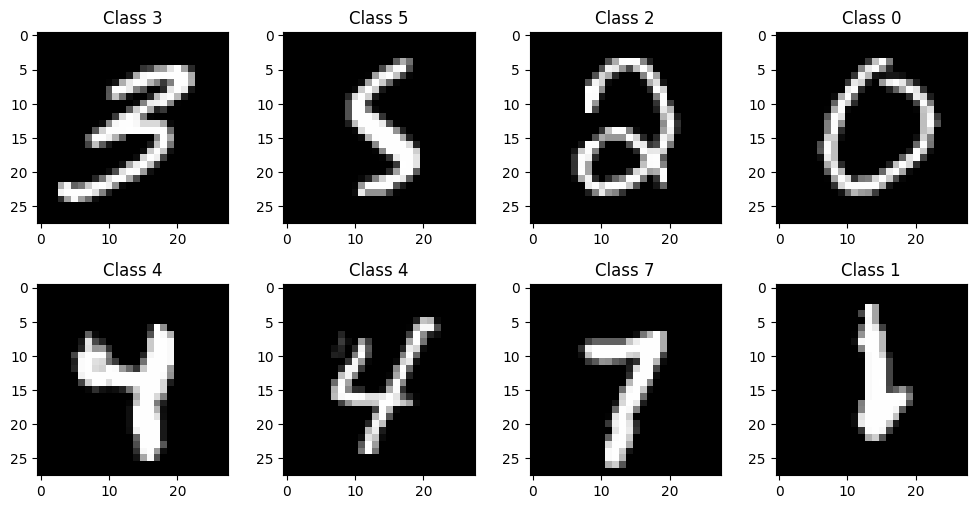

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data() # Downloads the Minst dataset from TensorFlow

# show image of training data
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10)) # set size of figure 10x10
rand_indexes = np.random.randint(0, x_train.shape[0], 8) # select 8 digits(0~9) randomly 
print(rand_indexes)

for index,im_index in enumerate(rand_indexes):
    plt.subplot(4, 4, index+1)
    plt.imshow(x_train[im_index], cmap = 'gray', interpolation = 'none')
    plt.title('Class %d' % y_train[im_index])
plt.tight_layout()




<Axes: ylabel='count'>

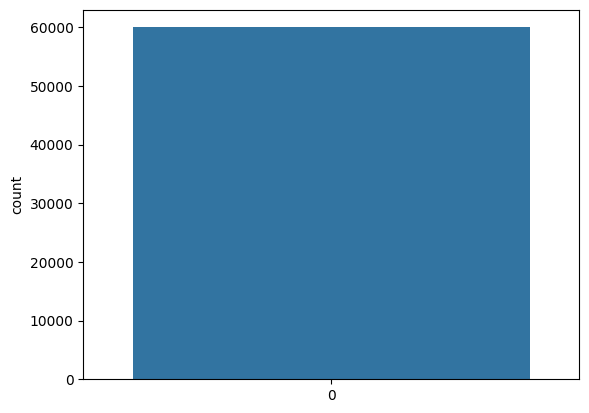

In [6]:
sns.countplot(y_train)

**2.2 Check for NaN Values**

In [7]:
np.isnan(x_train).any()
np.isnan(x_test).any()

False

**2.3 Normalization and Reshaping**

In [8]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

**2.4 Label Encoding**

In [9]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

**2.5 Visualize Data**

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


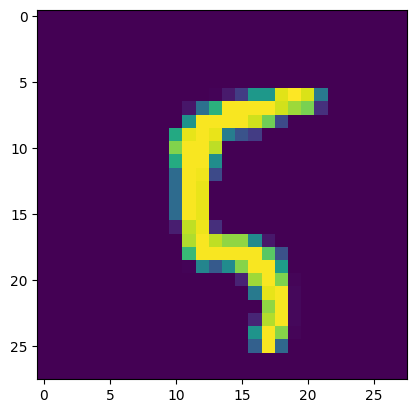

In [10]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

# 3. The CNN Model

In [11]:
batch_size = 64
num_classes = 10
epochs = 5

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**3.2 Fit the Training Data**

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5


I0000 00:00:1727092752.564573     125 service.cc:145] XLA service 0x7b61300055e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727092752.564619     125 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727092752.564623     125 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 37/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.4511 - loss: 1.5758  

I0000 00:00:1727092757.206711     125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - acc: 0.8956 - loss: 0.3179 - val_acc: 0.9893 - val_loss: 0.0347
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9879 - loss: 0.0417 - val_acc: 0.9915 - val_loss: 0.0327
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9920 - loss: 0.0262 - val_acc: 0.9908 - val_loss: 0.0294
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9937 - loss: 0.0198 - val_acc: 0.9930 - val_loss: 0.0273
Epoch 5/5
836/844 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9949 - loss: 0.0154
Reached 99.5% accuracy so cancelling training!
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9949 - loss: 0.0154 - val_acc: 0.9928 - val_loss: 0.0304


# 4. Evaluate the Model

In [13]:
#test model(Evaluate the model on the test set and analyze the accuracy)
preds = model.predict(x_test[0].reshape(-1,28,28,1))
print(int(np.argmax(preds)))

#Evaluate Model
#score = model.evaluate(x_test, y_test)
#print('Test loss: ', score[0])
#print('Test accuracy: ', score[1])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=2)
print("Test Accuracy: ", test_acc)
print("Test loss:", test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
7
313/313 - 2s - 5ms/step - acc: 0.9930 - loss: 0.0217
Test Accuracy:  0.9929999709129333
Test loss: 0.021707214415073395


tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(10,), dtype=float32)


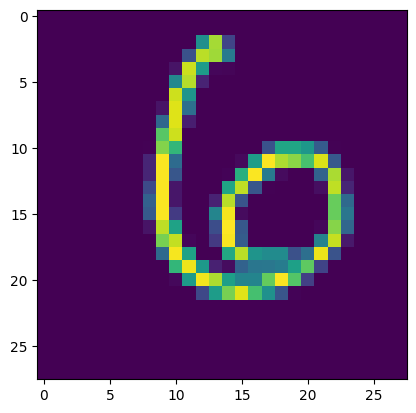

In [14]:
plt.imshow(x_test[100][:,:,0])
print(y_test[100])

**4.1 Loss and Accuracy Curves**

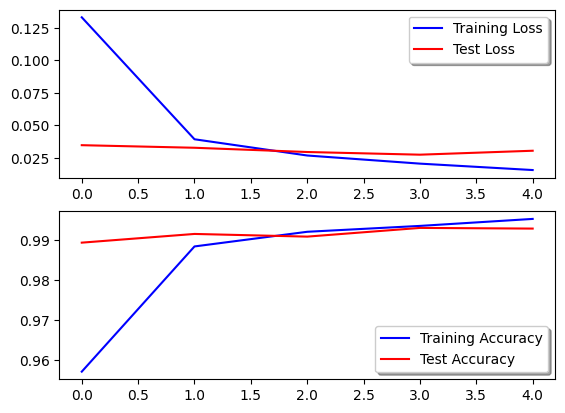

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Test Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Test Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**4.2 Predict Results**

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9906 - loss: 0.0284


**4.3 Confusion Matrix**

<Axes: >

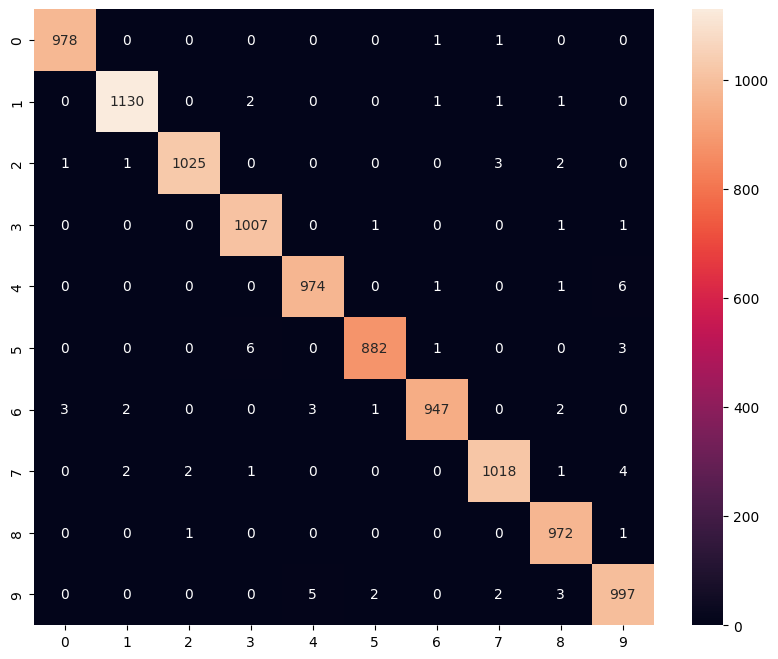

In [18]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

# Finding how many correct & incorrect predictions 

In [27]:
# Showing some wrong results, and the difference between the predicted label and the real labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
#most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
#display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [24]:
#get the predictions for the test data
Y_pred = model.predict(x_test)
#get the indices to be plotted
y_true = np.argmax(y_test,axis=1)

correct = np.nonzero(Y_pred_classes==y_true)[0]
misclassified = np.nonzero(Y_pred_classes!=y_true)[0]

print("Correct predicted classes:",correct.shape[0])
print("Misclassified predicted classes:",misclassified.shape[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Correct predicted classes: 9930
Misclassified predicted classes: 70


# Displaying some Correct & Incorrect predicted samples

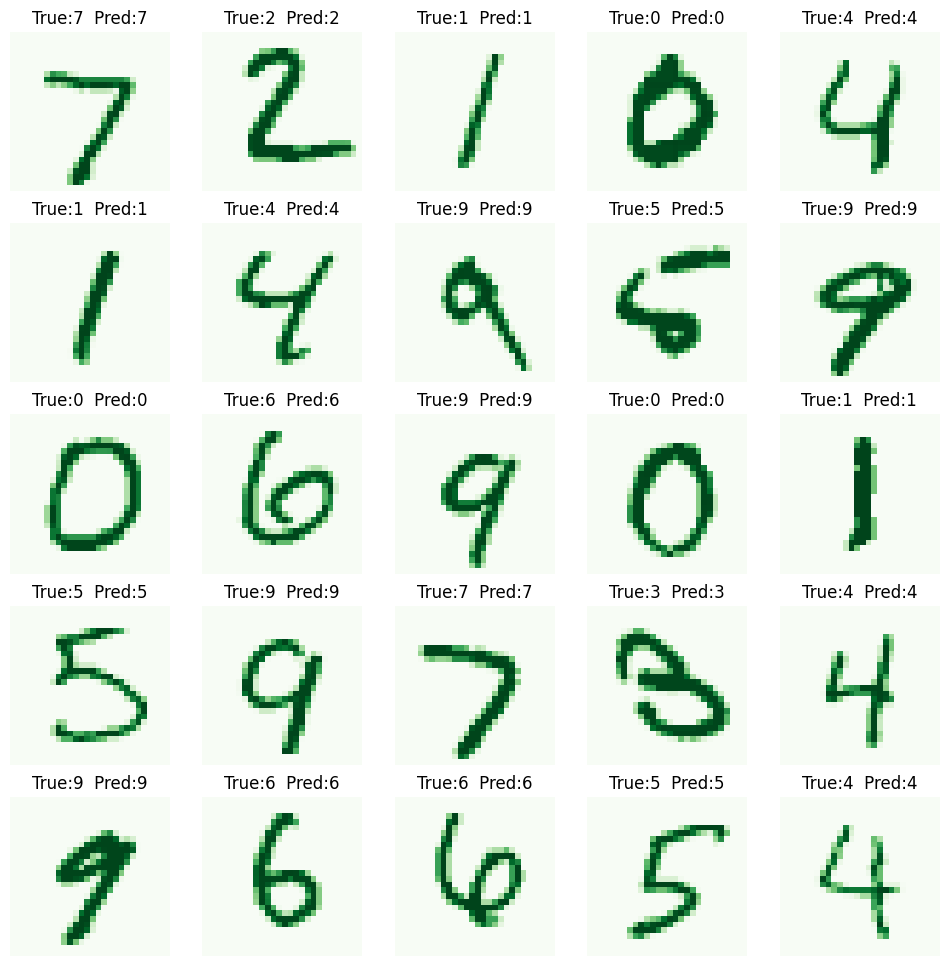

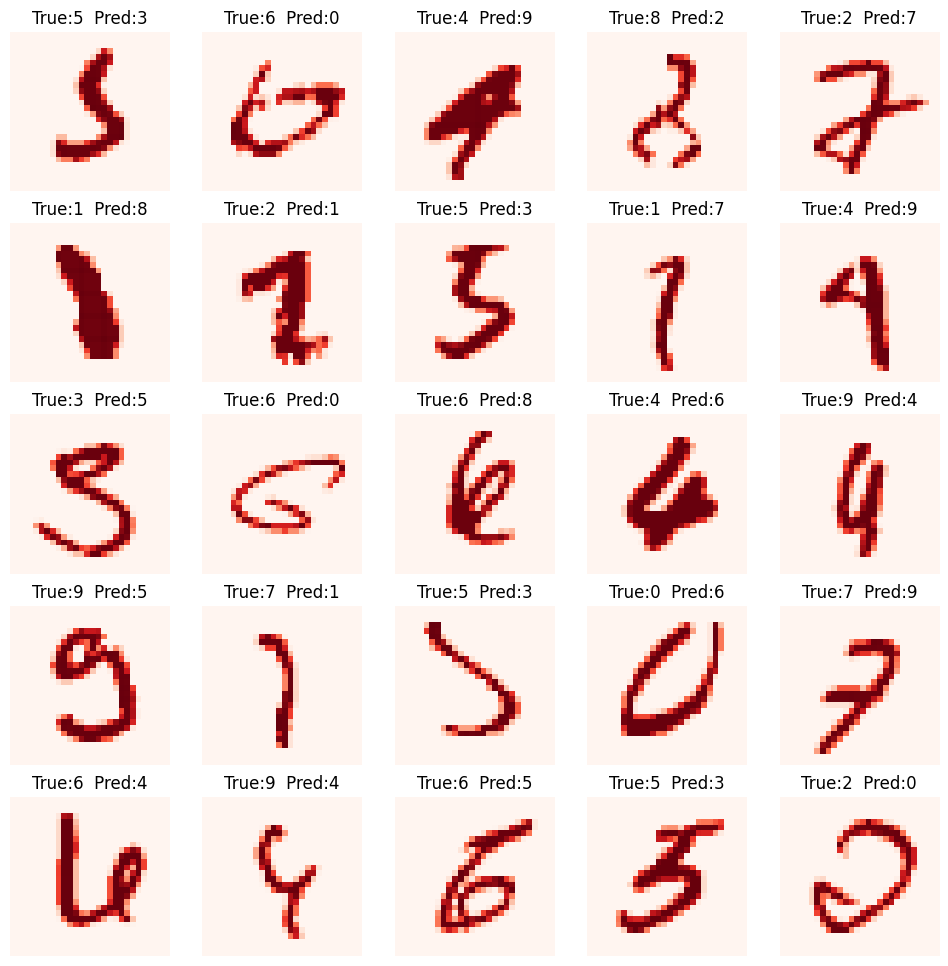

In [26]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,5, figsize=(12,12))

    for i, indx in enumerate(data_index[:25]):
        ax[i//5, i%5].imshow(x_test[indx].reshape(28,28), cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("True:{}  Pred:{}".format(y_true[indx],Y_pred_classes[indx]))
    plt.show()    

plot_images(correct, "Greens")
plot_images(misclassified, "Reds")